In [1]:
# python=3.6
# example code for reading nifti file
# using pip in conda to install nibabel
import os
import numpy as np
from nibabel.testing import data_path

dataset_path = '../../dataset/training/'
patient_list = os.listdir(dataset_path)

# there 4 types of file in the folder
# cfg file; frame file; ground truth; 4d nii
# example for displaying the 4d file

file_path = dataset_path + patient_list[0] + '/'
file_list = os.listdir(file_path)
for i in file_list:
    if '4d' in i:
        file = file_path + i
        

In [2]:
import nibabel as nib
img = nib.load(file)
img.shape

(216, 256, 10, 30)

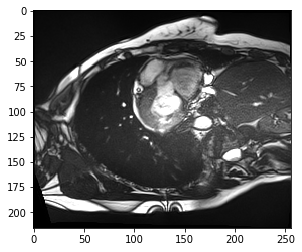

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
img_data = img.get_fdata()
plt.imshow(img_data[:,:,0,0], cmap='gray', vmin=0, vmax=255)
plt.show()

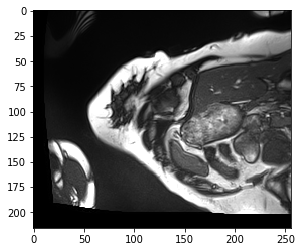

In [4]:
# animation on 3rd axis
from IPython.display import HTML
from matplotlib import animation, rc
fig = plt.figure()
ims = []
for i in range(img.shape[2]):
    im = plt.imshow(img_data[:,:,i,0], 
                    cmap='gray', vmin=0,
                    vmax=255, animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=1000, 
                                blit=True, repeat=True, 
                                repeat_delay=500)
HTML(ani.to_html5_video())
# ani.save('3rd_axis.gif')

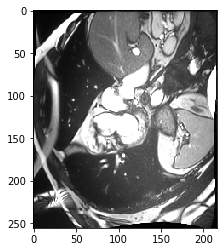

In [38]:
# animation on 4th axis
fig = plt.figure()
ims = []
for i in range(img.shape[3]):
    im = plt.imshow(img_data[:,:,0,i], 
                    cmap='gray', vmin=0,
                    vmax=255, animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=1000, 
                                blit=True, repeat=True, 
                                repeat_delay=500)
HTML(ani.to_html5_video())